# Project 1: Decision Trees

In [407]:
# Part 1: Building the Decision Tree

# Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Toy dataset based off of local weather
data = {
    "Temperature": [53, 67, 69, 34, 37, 56, 35, 37, 41, 37, 48, 51, 50, 50, 39],
    "Humidity": [34, 51, 57, 52, 42, 50, 54, 38, 49, 62, 53, 94, 67, 57, 50],
    "Wind Speed": [6, 14, 22, 20, 13, 19, 17, 15, 18, 10, 21, 14, 10, 6, 15],
    "Rain": [0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1],
}

df = pd.DataFrame(data)
print(df)

    Temperature  Humidity  Wind Speed  Rain
0            53        34           6     0
1            67        51          14     0
2            69        57          22     1
3            34        52          20     1
4            37        42          13     0
5            56        50          19     0
6            35        54          17     1
7            37        38          15     0
8            41        49          18     1
9            37        62          10     1
10           48        53          21     0
11           51        94          14     1
12           50        67          10     1
13           50        57           6     1
14           39        50          15     1


In [408]:
# Normalize
scaler = StandardScaler()
df[["Temperature", "Humidity", "Wind Speed"]] = scaler.fit_transform(
    df[["Temperature", "Humidity", "Wind Speed"]]
)

# Split
X = df[["Temperature", "Humidity", "Wind Speed"]]
y = df["Rain"]  # Target variable

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Train and predict tree model with depth of 1
clf = DecisionTreeClassifier(max_depth=1, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [409]:
# Part 2: Debugging Issues

# Calculate accuracy on training vs test set
train_acc = clf.score(X_train, y_train)
test_acc = clf.score(X_test, y_test)

print(f"Training Set Accuracy: {train_acc * 100:.2f}%")
print(f"Testing Set Accuracy: {test_acc* 100:.2f}%")

Training Set Accuracy: 80.00%
Testing Set Accuracy: 80.00%


In [410]:
# Create tweaked model with higher tree depth to address underfitting
clf_adjusted = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_adjusted.fit(X_train, y_train)

train_acc = clf_adjusted.score(X_train, y_train)
test_acc = clf_adjusted.score(X_test, y_test)

print(f"Training Set Accuracy: {train_acc * 100:.2f}%")
print(f"Testing Set Accuracy: {test_acc* 100:.2f}%")

Training Set Accuracy: 100.00%
Testing Set Accuracy: 100.00%


In [411]:
# Part 3: Evaluating the Model

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
)

y_pred = clf.predict(X_test)

# Calculate scores
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")

Accuracy: 80.00%
Precision: 0.75
Recall: 1.00


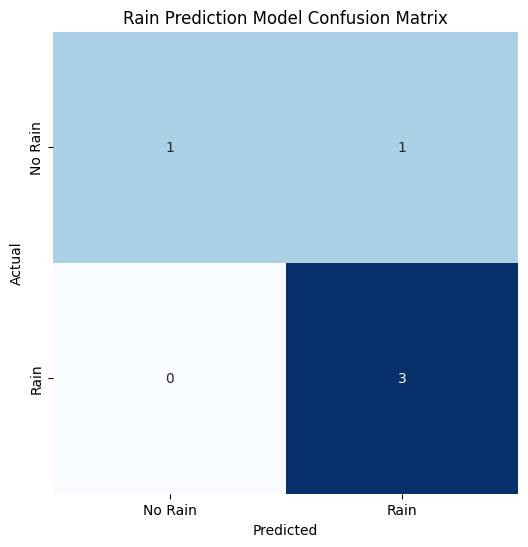

In [412]:
# Produce confusion matrix

import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Rain", "Rain"],
    yticklabels=["No Rain", "Rain"],
    cbar=False,
)
plt.title("Rain Prediction Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()